<a href="https://colab.research.google.com/github/Deividasbu/Technical-task/blob/main/Supporting_materials_for_technical_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# importing data and renaming the names of the columns for easier analysis
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('dataset.xlsx')
df = df.drop(columns=('ROW'))
df.rename(columns={'Basket_ID':'basket_id', 'Product category ID': 'product_category_id',
                   '# of items': 'number_of_items', 'REGION ID for shipping': 'region_id', 
                   'Region Name': 'region_name', 'Purchase date': 'purchase_date', 
                   'REVENUE': 'revenue', 'GROSS PROFIT': 'gross_profit'}, inplace=True)

products = pd.read_excel('products.xlsx')
products.rename(columns={'Product category': 'product_category', 'ID': 'id'}, inplace=True)

In [106]:
# Joining names of prouct categories 
df = pd.merge(df, products, left_on='product_category_id', right_on='id', how='left')
df = df.drop(columns=('id'))
df.head()

,basket_id,product_category_id,number_of_items,region_id,region_name,purchase_date,revenue,gross_profit,product_category
0,400157,116,1,3,Techton,2017-06-22,28.9,3.179,Women’s shoes & socks
1,400157,118,1,3,Techton,2017-06-22,30.5,3.660,Moisturizers & balms
2,400189,116,1,3,Techton,2016-11-30,30.5,2.745,Women’s shoes & socks
3,400189,118,1,3,Techton,2016-11-30,20.9,3.762,Moisturizers & balms
4,400251,113,1,3,Techton,2017-04-09,24.5,7.350,Bracelets


In [107]:
# Creating new variables
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['profit_per_item'] = df['gross_profit'] / df['number_of_items']
df['costs_per_item'] = (df['revenue'] - df['gross_profit']) / df['number_of_items']
df['profit_margin'] = df['gross_profit'] / df['revenue']

In [51]:
aggregations = df.groupby(['region_name', 'product_category']).agg({'number_of_items':'sum', 'gross_profit': 'sum', 'revenue': 'sum', 
                                                                    'profit_per_item': 'mean', 'profit_margin': 'mean', 'costs_per_item': 'mean'}).reset_index().sort_values(by=['gross_profit'], ascending=False)

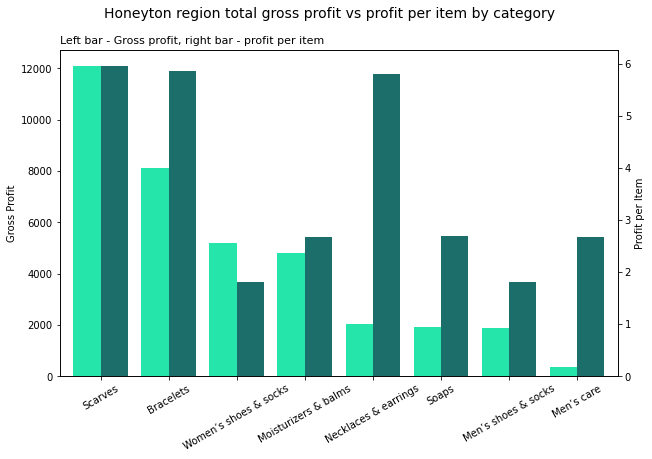

In [52]:
# Plotting Honeyton gross profits vs profit margin
df_hon = aggregations[aggregations['region_name'] == 'Honeyton']
df_hon.set_index("product_category",inplace=True)

fig = plt.figure(figsize=(10,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx()

x_val = range(8)
width = 0.4

df_hon.gross_profit.plot(kind='bar', color='#25e5aa', ax=ax, width=width, position=1)
df_hon.profit_per_item.plot(kind='bar', color='#1b6e6a', ax=ax2, width=width, position=0)

ax.set_title('Left bar - Gross profit, right bar - profit per item ', size=11, loc='left')
plt.suptitle('Honeyton region total gross profit vs profit per item by category', size=14)
ax.set_ylabel('Gross Profit')
ax2.set_ylabel('Profit per Item')
ax.set_xlabel('')
plt.xlim([min(x_val) - 0.6, max(x_val) + 0.6])


for ax in [ax,ax2]:
    for label in ax.get_xticklabels():
        label.set_rotation(30) 

fig.savefig("honeyton.png",dpi=300, bbox_inches = "tight")

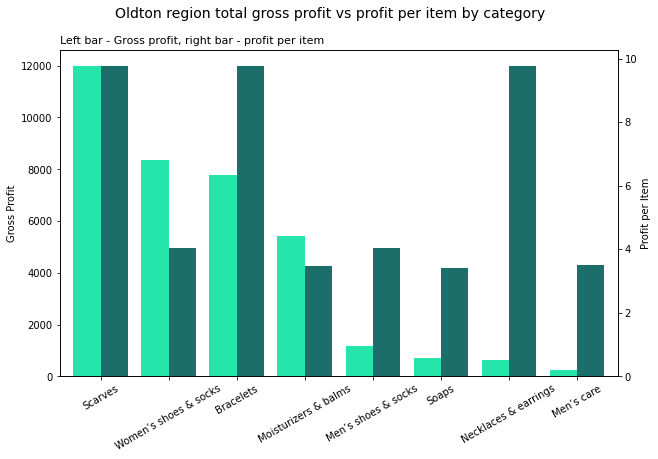

In [53]:
# Plotting Oldton gross profits vs profit margin
df_old = aggregations[aggregations['region_name'] == 'Oldton']
df_old.set_index("product_category",inplace=True)

fig = plt.figure(figsize=(10,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx()

x_val = range(8)
width = 0.4

df_old.gross_profit.plot(kind='bar', color='#25e5aa', ax=ax, width=width, position=1)
df_old.profit_per_item.plot(kind='bar', color='#1b6e6a', ax=ax2, width=width, position=0)

ax.set_title('Left bar - Gross profit, right bar - profit per item ', size=11, loc='left')
plt.suptitle('Oldton region total gross profit vs profit per item by category', size=14)
ax.set_ylabel('Gross Profit')
ax2.set_ylabel('Profit per Item')
ax.set_xlabel('')
plt.xlim([min(x_val) - 0.6, max(x_val) + 0.6])


for ax in [ax,ax2]:
    for label in ax.get_xticklabels():
        label.set_rotation(30) 

fig.savefig("oldton.png",dpi=300, bbox_inches = "tight")

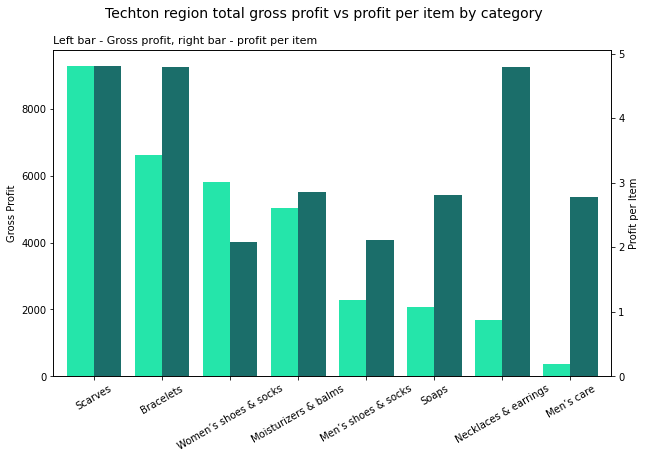

In [54]:
# Plotting Techton gross profits vs profit margin
df_tech = aggregations[aggregations['region_name'] == 'Techton']
df_tech.set_index("product_category",inplace=True)

fig = plt.figure(figsize=(10,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx()

x_val = range(8)
width = 0.4

df_tech.gross_profit.plot(kind='bar', color='#25e5aa', ax=ax, width=width, position=1)
df_tech.profit_per_item.plot(kind='bar', color='#1b6e6a', ax=ax2, width=width, position=0)

ax.set_title('Left bar - Gross profit, right bar - profit per item ', size=11, loc='left')
plt.suptitle('Techton region total gross profit vs profit per item by category', size=14)
ax.set_ylabel('Gross Profit')
ax2.set_ylabel('Profit per Item')
ax.set_xlabel('')
plt.xlim([min(x_val) - 0.6, max(x_val) + 0.6])


for ax in [ax,ax2]:
    for label in ax.get_xticklabels():
        label.set_rotation(30) 

fig.savefig("techton.png",dpi=300, bbox_inches = "tight")

In [88]:
import plotly.figure_factory as ff

honeyton_profit = aggregations[aggregations['region_name'] == 'Honeyton'][['product_category', 'gross_profit', 'profit_per_item', 'number_of_items']]
honeyton_profit.gross_profit = honeyton_profit.gross_profit.round(0)
honeyton_profit.profit_per_item = honeyton_profit.profit_per_item.round(2)

fig =  ff.create_table(honeyton_profit)
fig.update_layout(
    autosize=False,
    width=620,
    height=300,
)
fig.show()

In [89]:
techton_profit = aggregations[aggregations['region_name'] == 'Techton'][['product_category', 'gross_profit', 'profit_per_item', 'number_of_items']]
techton_profit.gross_profit = techton_profit.gross_profit.round(0)
techton_profit.profit_per_item = techton_profit.profit_per_item.round(2)

fig =  ff.create_table(techton_profit)
fig.update_layout(
    autosize=False,
    width=620,
    height=300,
)
fig.show()

In [90]:
oldton_profit = aggregations[aggregations['region_name'] == 'Oldton'][['product_category', 'gross_profit', 'profit_per_item', 'number_of_items']]
oldton_profit.gross_profit = oldton_profit.gross_profit.round(0)
oldton_profit.profit_per_item = oldton_profit.profit_per_item.round(2)

fig =  ff.create_table(oldton_profit)
fig.update_layout(
    autosize=False,
    width=620,
    height=300,
)
fig.show()

In [92]:
aggregations = df.groupby(['region_name']).agg({'number_of_items':'sum', 'gross_profit': 'sum', 'revenue': 'sum', 'profit_per_item': 'mean', 
                                                'profit_margin': 'mean', 'costs_per_item': 'mean'}).reset_index().sort_values(by=['gross_profit', 'costs_per_item'])
aggregations.gross_profit = aggregations.gross_profit.round(1)
aggregations.profit_per_item = aggregations.profit_per_item.round(2)
aggregations.profit_margin = aggregations.profit_margin.round(3)
aggregations.costs_per_item = aggregations.costs_per_item.round(2)

fig =  ff.create_table(aggregations)
fig.update_layout(
    autosize=False,
    width=1000,
    height=200,
)
fig.show()

In [ ]:
df = df.set_index("purchase_date",inplace=True)
mth_aggregations = df.groupby('region_name').resample("W").agg({'number_of_items':'count', 'gross_profit': 'sum', 'revenue': 'sum',
                                                                'profit_per_item': 'mean', 'profit_margin': 'mean', 'costs_per_item': 'mean'}).reset_index()


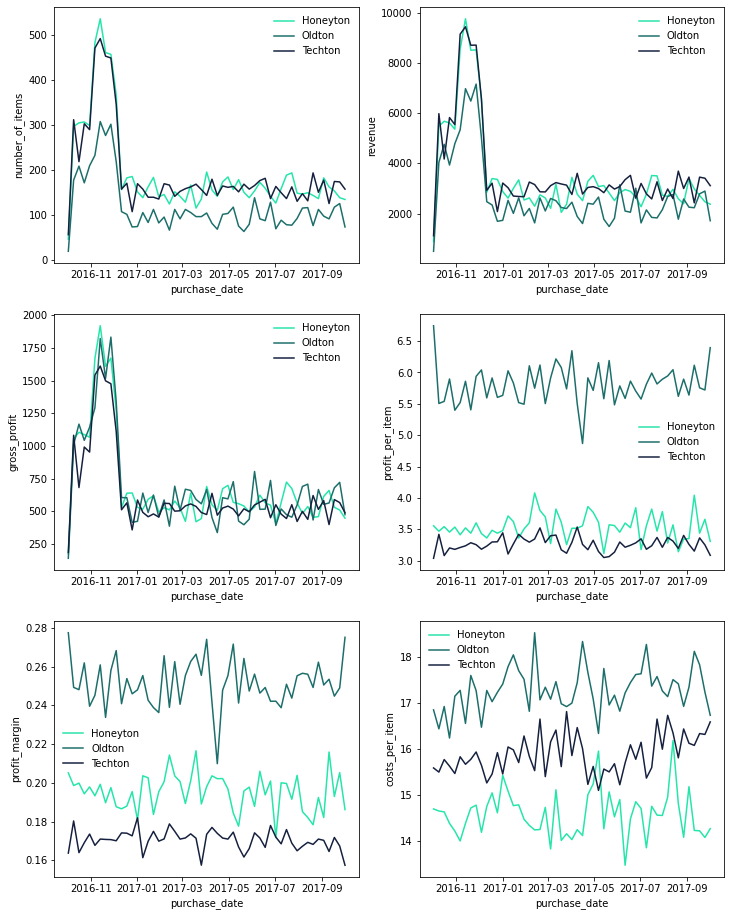

In [102]:
# Plotting time series data

columns = ['number_of_items', 'revenue', 'gross_profit', 'profit_per_item', 'profit_margin', 'costs_per_item']

colors = ["#25e5aa", "#1b6e6a", '#15203e']
sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=(12,16))
position = 1

for i in columns:
    plt.subplot(3, 2, position)
    plt.ylabel(i)
    sns.lineplot(x='purchase_date', y=i, data=mth_aggregations, hue='region_name')
    plt.legend(frameon=False)
    position += 1
fig.savefig("time_series.png",dpi=300, bbox_inches = "tight")

In [111]:
aggregations = df.groupby(['region_name', 'product_category']).agg({'number_of_items':'sum', 'gross_profit': 'sum', 'revenue': 'sum', 
                                                                    'profit_per_item': 'mean', 'profit_margin': 'mean', 'costs_per_item': 'mean'}).reset_index().sort_values(by=['gross_profit', 'costs_per_item'])

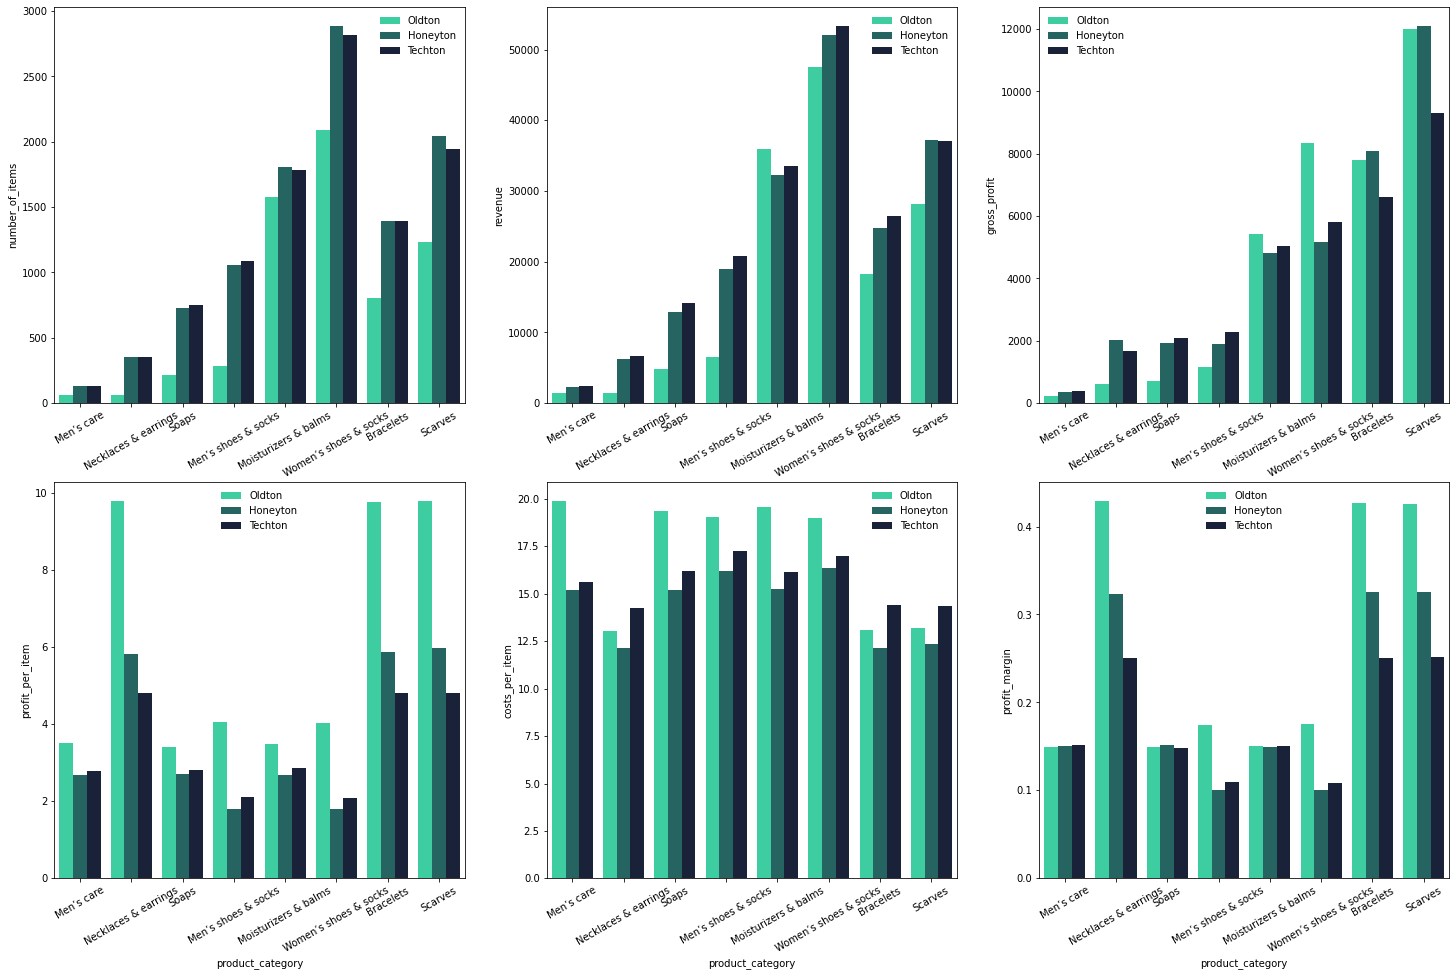

In [117]:
# Plotting product categories performance by region

columns = ['number_of_items', 'revenue', 'gross_profit', 'profit_per_item', 'costs_per_item', 'profit_margin']

colors = ["#25e5aa", "#1b6e6a", '#15203e']
sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize=(25,11))
position = 1

for i in columns:
    plt.subplot(2, 3, position)
    plt.subplots_adjust(left=0.125, bottom=-0.2, right=0.9, top=0.9, wspace=0.2 , hspace=0.2)
    plt.ylabel(i)
    sns.barplot(x='product_category', y=i, data=aggregations, hue='region_name')
    plt.legend(frameon=False,)
    plt.xticks(rotation=30)
    position += 1
fig.savefig("bar_charts.png",dpi=300, bbox_inches = "tight")